### About The Data
- There are 12 classes 
    - Age in years 
    - Gender (Male or Female)
    - Height in cm 
    - Weight in Kg 
    - Bodyfat in percentage 
    - Diastolic, this is the diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats per min
    - Systolic, this is the systolic blood pressure, measures the pressure in your arteries when your heart beats per min
    - Gribforce in Kg
    - Sit and Bend Forward Movement in cm 
    - Sit-up in a count 
    - Broad Jump in cm 
    - Class it is a performance measure either A, B, C, or D. The data’s author did not specify the metric. But i believe that Class A is the best and Class D is the worst


### Import the libraries 

In [3]:
#import the required libearies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Import the data & Perform Basic Analyzation

In [4]:
#Import the data 
df = pd.read_csv("Data/bodyPerformance.csv")
df

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [5]:
#convert all whitespaces into nan. 
df = df.replace(r'^\s*$', np.nan, regex=True)

In [6]:
#drop any nan
df = df.dropna() 

In [7]:
#Checkout the following:
#Number of rows --> 167 
#null values in anyrow --> none
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [8]:
#Check the unique values in the non-continuous features
df['gender'].unique() , df['class'].unique()

(array(['M', 'F'], dtype=object), array(['C', 'A', 'B', 'D'], dtype=object))

### Perform EDA on the data

In [9]:
df.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

- For all the features (numerical and categorical we have 13393 entries)
- The average age is 36.7 years with a standard deviation of 13.6. The data is captured for people between the ages of 21 and 64
- The average height is 169.55 with a standard deviation of 11.94. The tallest person is 193.8 cm and the shortest person is 125 cm
- The average weight is 67.4 kg with a standard deviation of 11.94. The heaviest person is 138.1 kg and the lightest person is 26.3 kg 
- The average body fat percentage is 23.2% with a standard deviation of 7%. The largest bf% is 78.4 % and the lowest bf% is 3%
- The average diastolic & systolic readings are 78.7 and 130.23 beats per min with a standard deviation of 14.7 and 10.6, respectively. 
- The average gripforce is 36.96 kg with a standard deviation of 10.62 with a largest grip force of 70.5kg and a minimum grib force of 0 kg (no gripforce) 
- The average distance for the sit and bend forward distance in cm is 15.2 cm with a standard deviation of 8.45 cm 
- The average number of sit-ups a person does is 39.7 with a standard deviation of 8.45. The highest number of sit-ups is 80 and the lowest is 0
- The average board jump distance in cm is 190 cm with a standard deviation of 39.8. The largest board jump os 303 cm and the smallest one is 0 cm

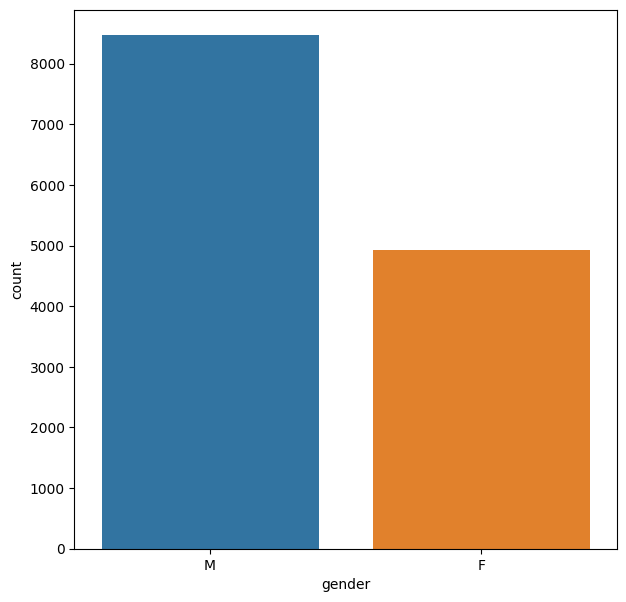

M    8467
F    4926
Name: gender, dtype: int64

In [10]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x=df['gender'])
plt.show()
df['gender'].value_counts()

- The data between males and females is not fully balanced. There are 8467 males and 4926 females

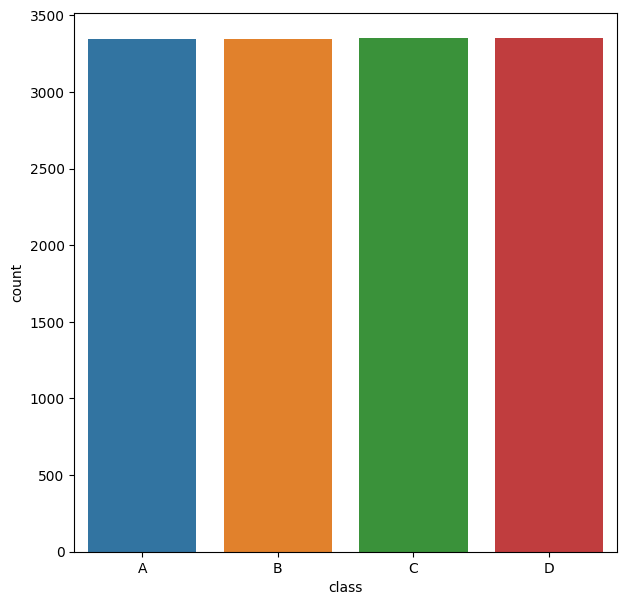

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [11]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x=df['class'], order = ['A', 'B', 'C', 'D'])
plt.show()
df['class'].value_counts()

- The data between the different classes of performance is balanced. The data's author did not specify the evaluation measurements for this feature. However, it was indicated that class A meant to be the class with the highest performance and class D is the class with the lowest performance

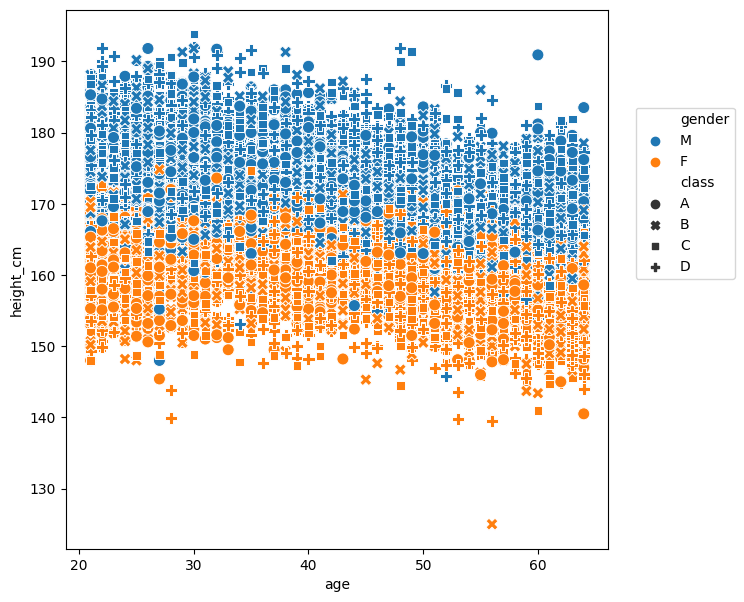

In [12]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['height_cm'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- Majority of males and taller than females 
- The data is balanced between males and females when it comes to age 
- The distrubtion of performance A,B,C and D is balanced for both males and females 

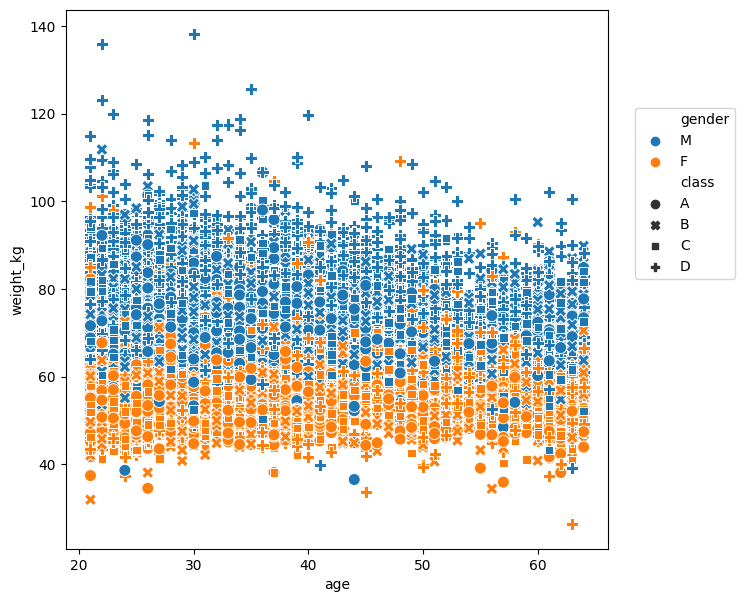

In [13]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['weight_kg'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- Males are heavier than females 
- At the highest weight of males the performance seem to be lowest which is class D. This could indicate that high weight refer to poor perfromance 

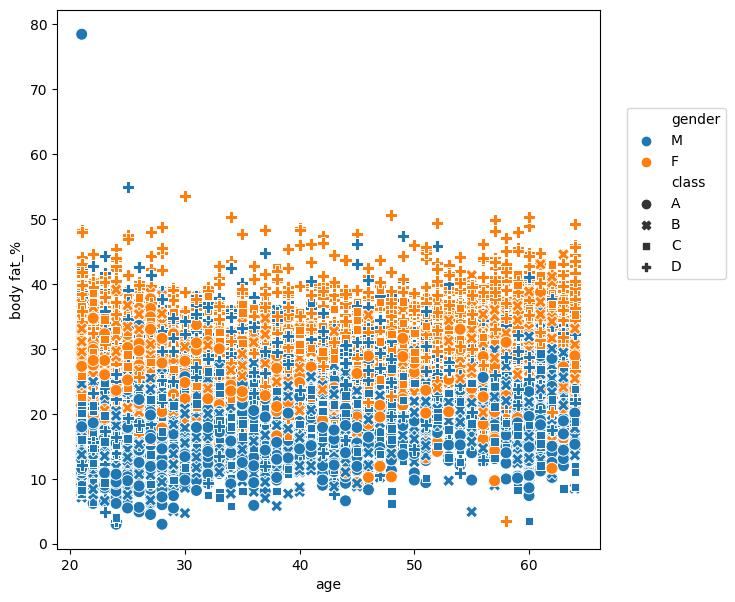

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['body fat_%'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- There is one male outlier who has a fat percentage of 78.4%. The rest of males and females have a fat percentage of 50 or below 
- Females have higher fat percentage than males 
- When it comes to perfromance females with the higher fat percentage seem to have a class D perfromance which indicates a low level of performance 
- Males and females have classes of A or B and few have class of C when the fat percentage decreases indicating increase in perfromance whne the fat percentage is low 

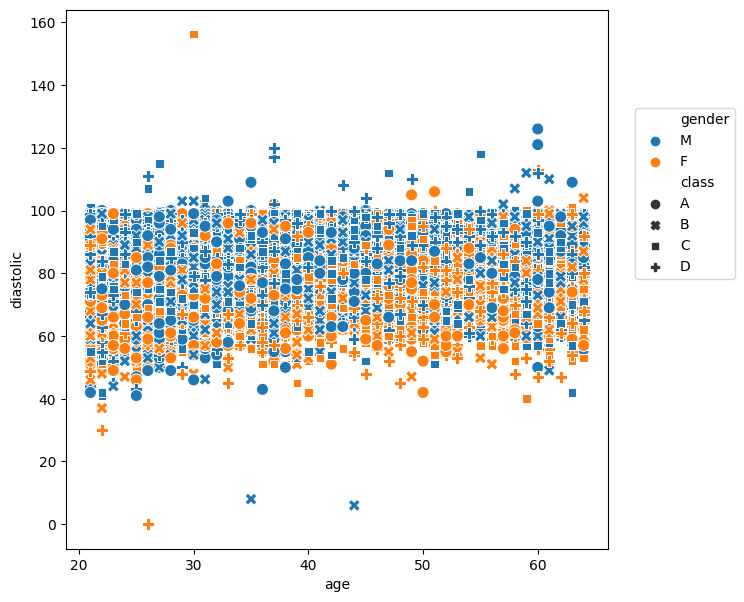

In [15]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['diastolic'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- There seem to be more females with lower diastolic rate

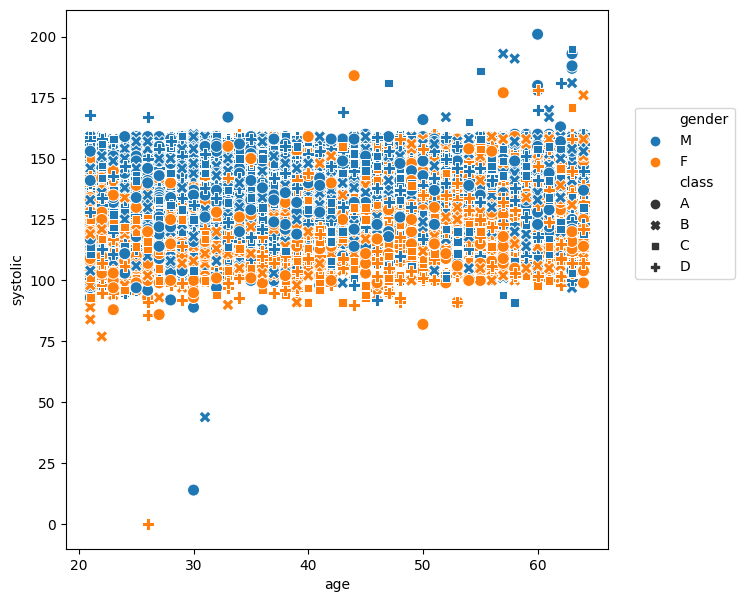

In [16]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['systolic'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- There seem to be more females with lower systolic rate

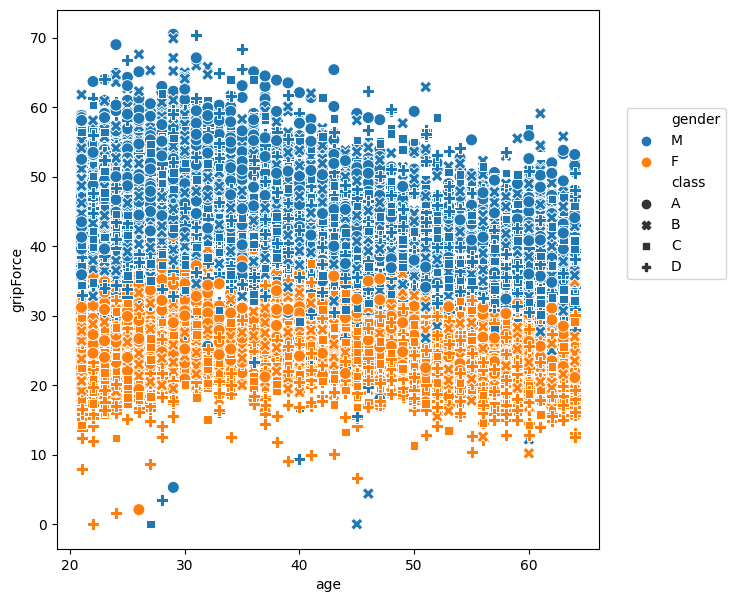

In [17]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['gripForce'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- Males have a larger the grip force than females 
- When it comes to performance the gribforce does not seem to be corrleated with any class significantly for either males or females 

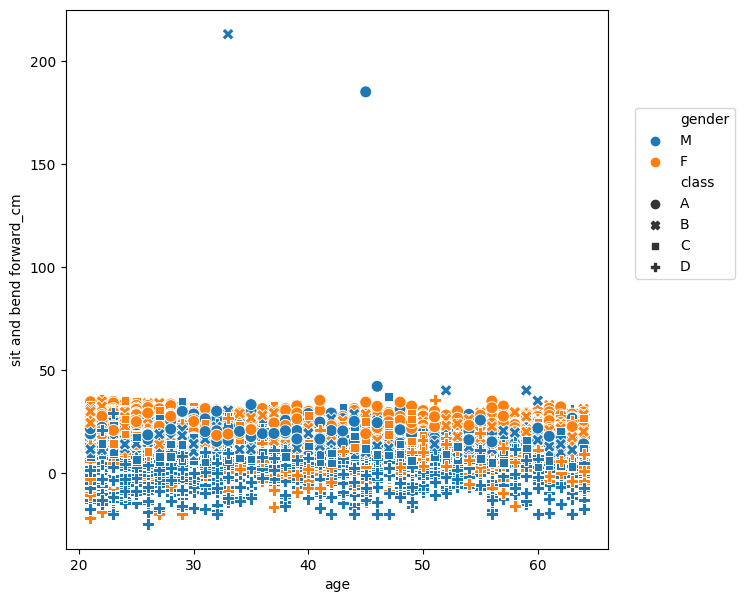

In [18]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['sit and bend forward_cm'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- There is couple male outliers for the sit and bend forward distance in cm which are above 150 cm and of different classes of perfroamnce (A and B)
- The majoirty of males and females have a sit and bend forward distance below 50 cm
- Femlaes seem to be on the higher end when it comes to the sit and bend forward distance

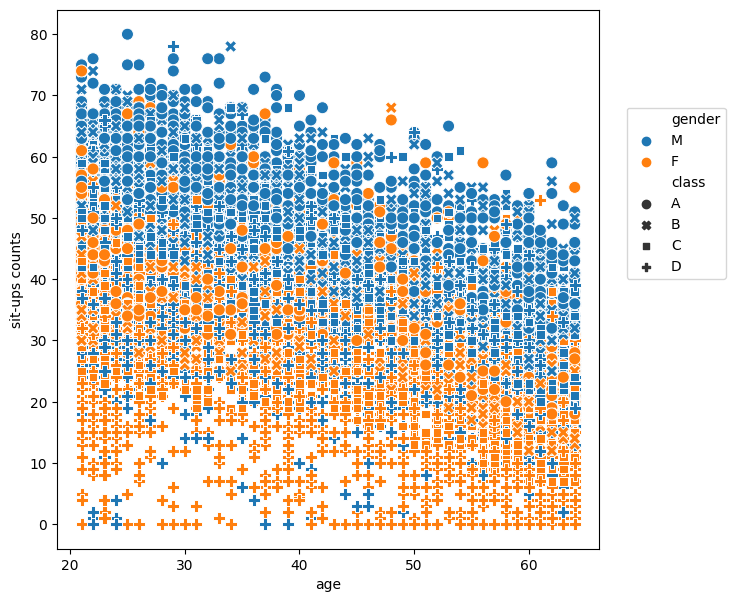

In [19]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['sit-ups counts'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- Males seem to be doing higher sit ups than females. However, there are few females iwth set ups above or close to 70 
- Females and males with the lowest situps are assigned to lowest perfromance class of class D and vice versa
- When it comes to age the older people get the lower set ups than can perfrom 

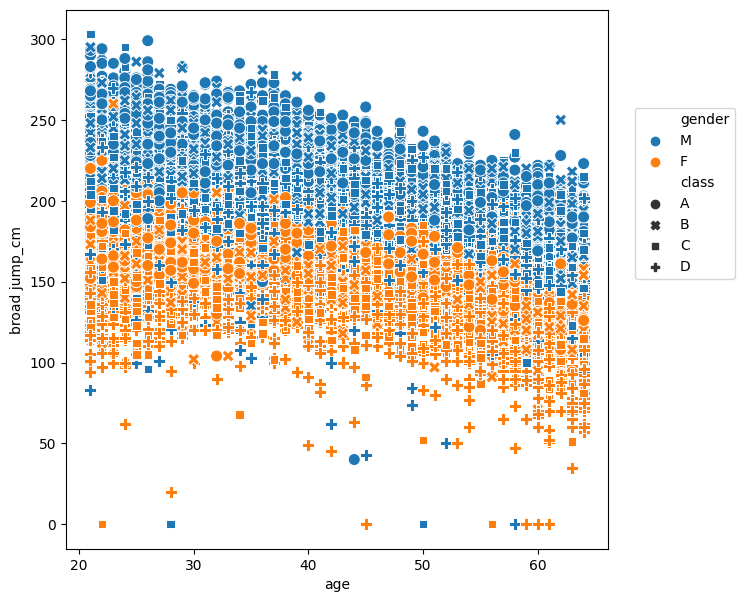

In [20]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['age'], y=df['broad jump_cm'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- Males seem to be doing higher jumps than females 
- Females and males with the lowest jumps tend to be assigned the lowest perfromance classes of classes C & D and vice versa
- When it comes to age the older people get the lower they can jump

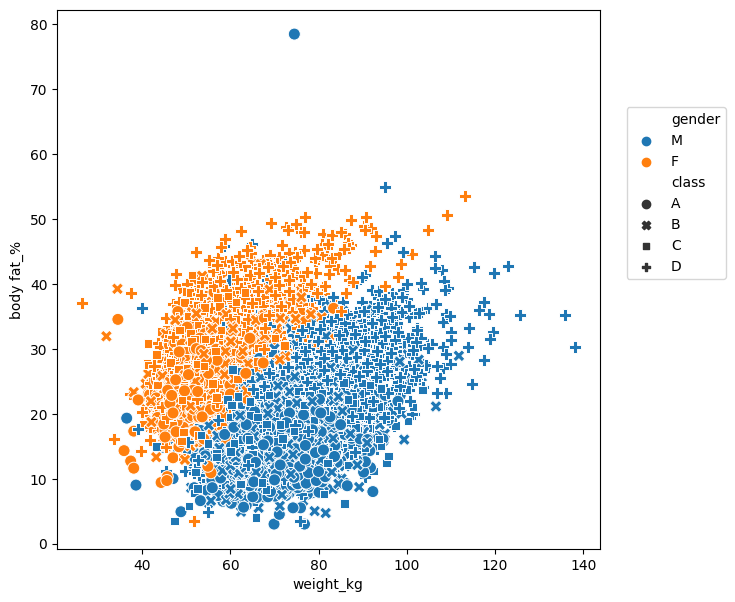

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['weight_kg'], y=df['body fat_%'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- There is a linear relationship between weight and body fat percentage increasing the weight also increases the body fat percentage as expected 
- people with higher weight and body fat percentage tend to belong to the class D 
- There is an outlier that has a weight of 80 and fat percentage of 80 

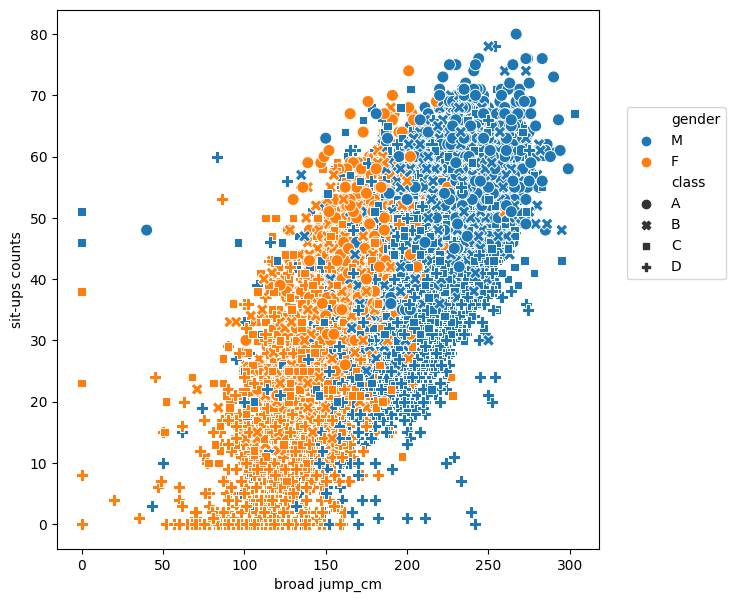

In [22]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x=df['broad jump_cm'], y=df['sit-ups counts'], hue='gender', style_order =['A', 'B', 'C', 'D'], style = 'class' , s=75)
plt.legend( loc=(1.05,0.5))
plt.show()

- There is a linear relationship between situps and the broad jump 
- people with higher sit up counts have higher broad jump and vice versa 
- people with the highest broad jump and situps tend to belong to class A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x1200 with 0 Axes>

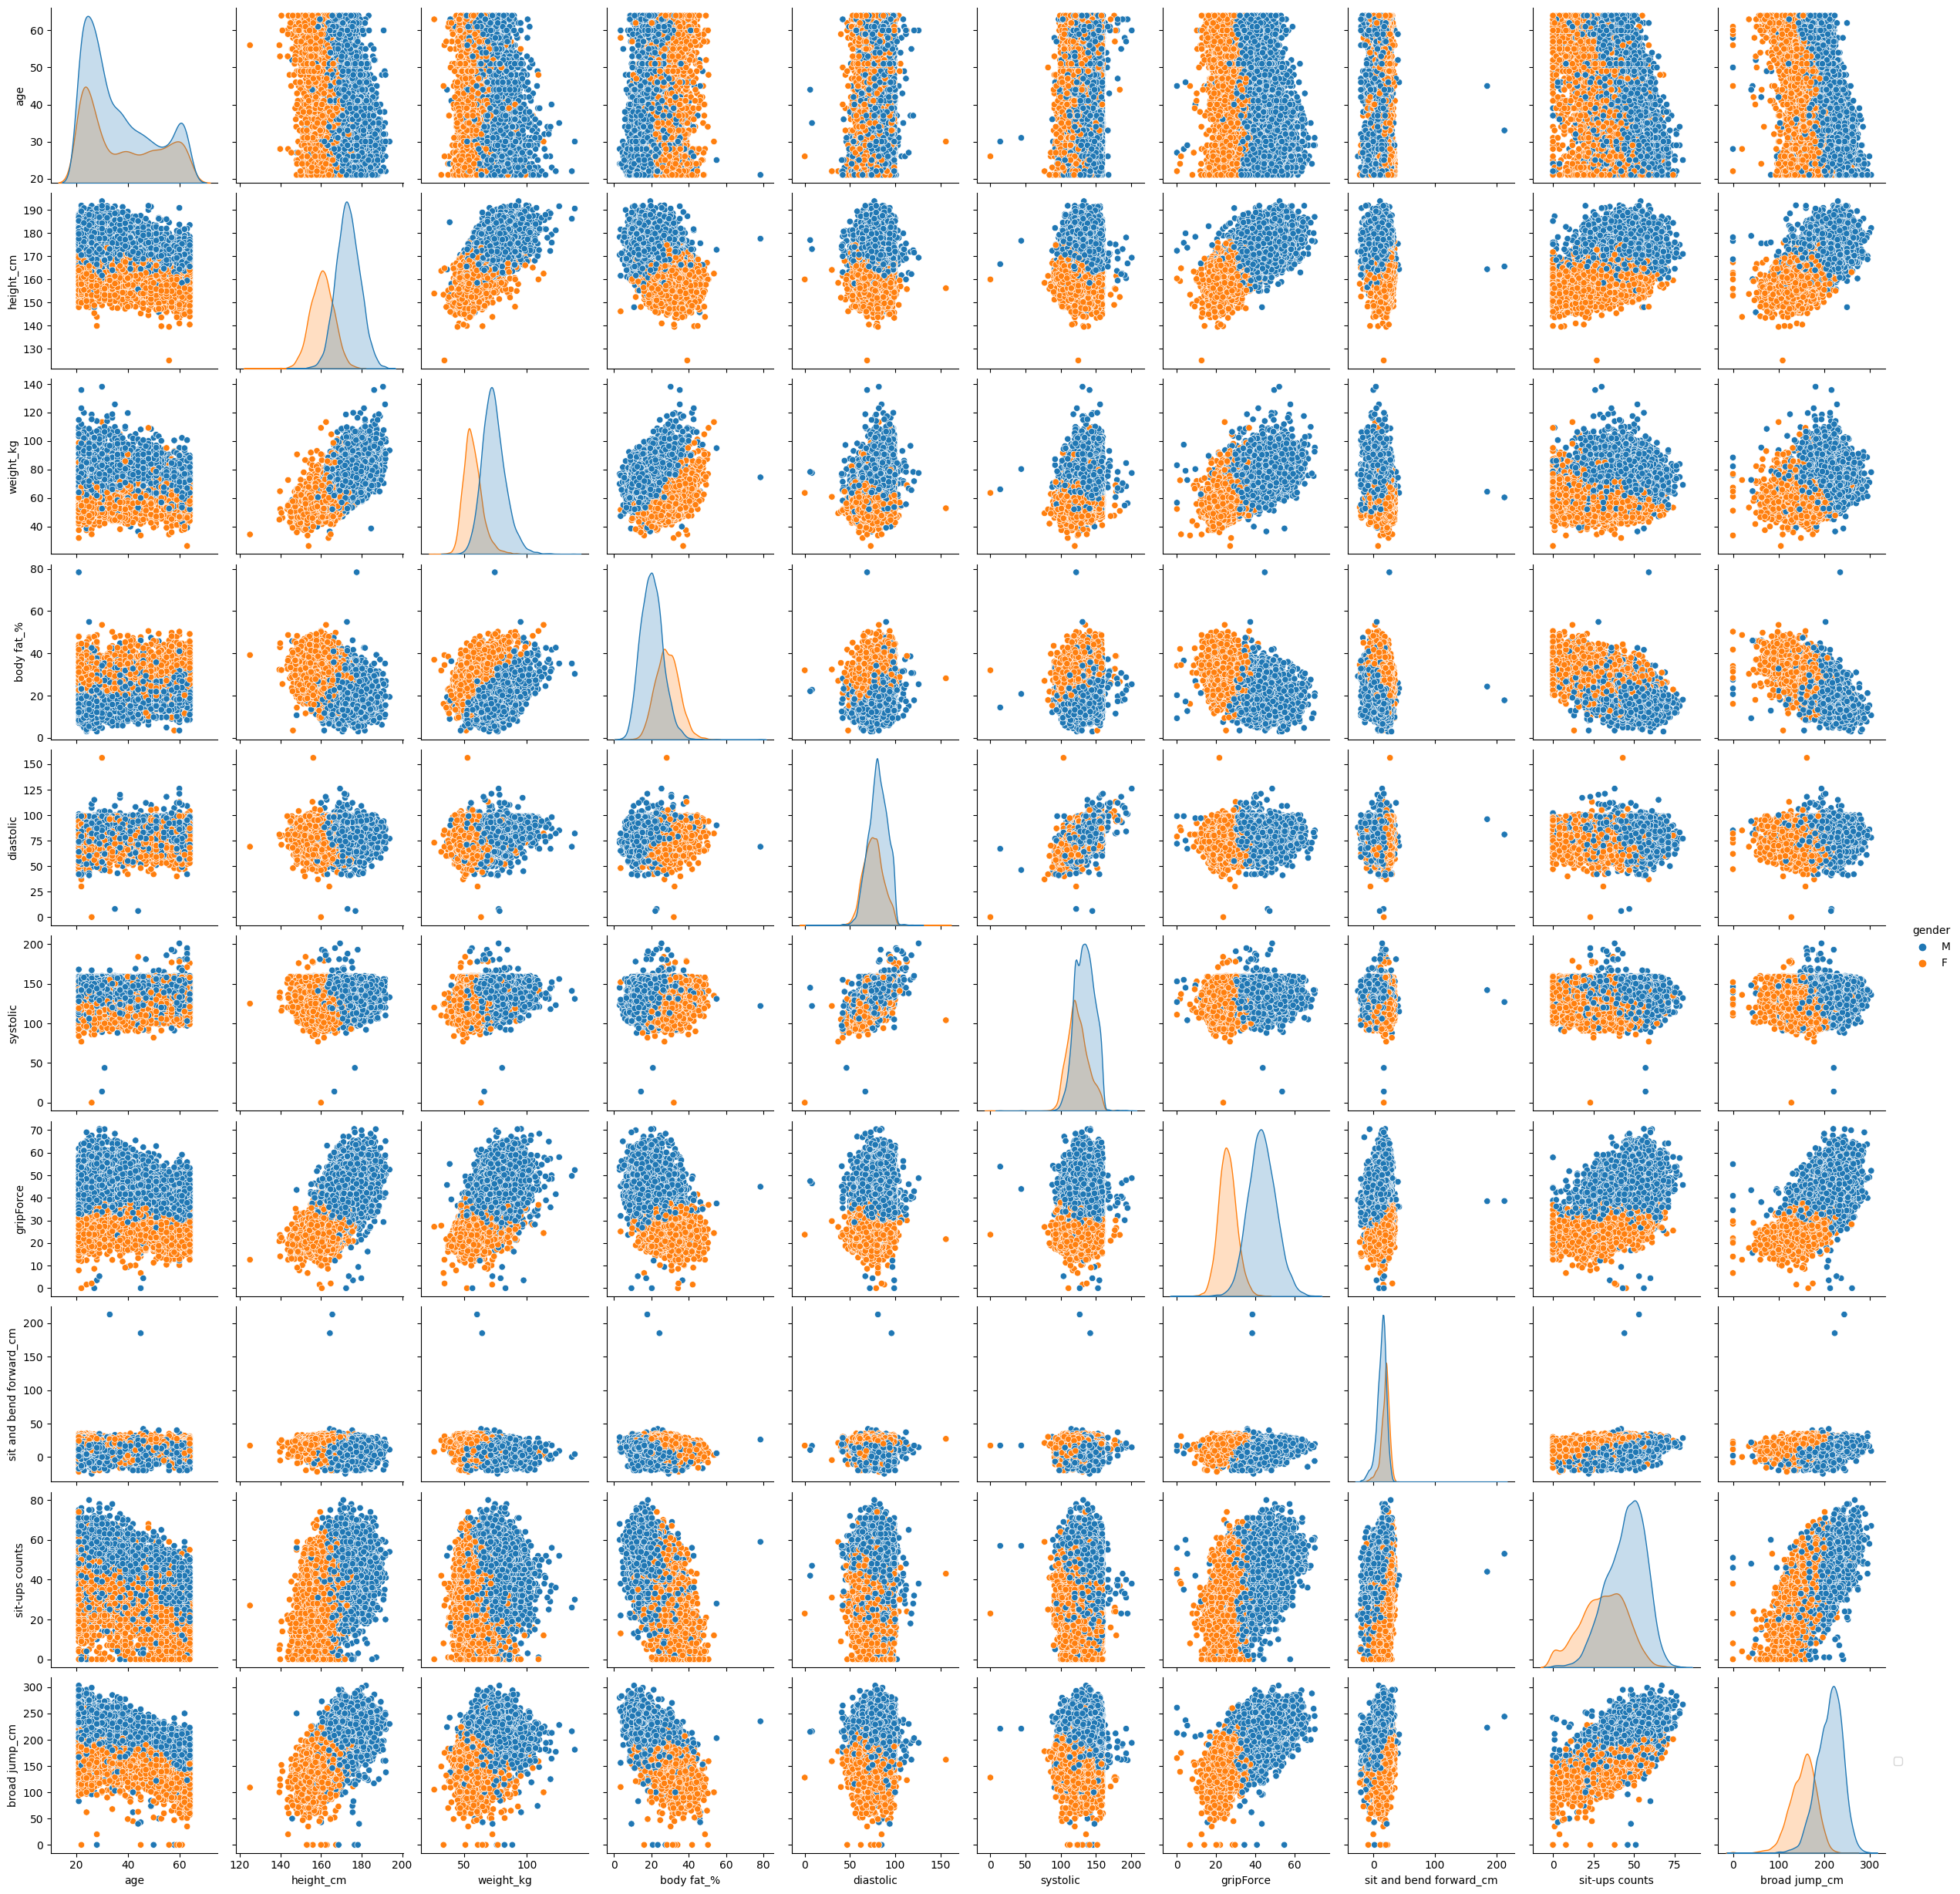

In [23]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df, hue='gender')
plt.legend( loc=(1.05,0.5))
plt.savefig('Figures/pairplot.JPG')
plt.show()


- The pairplot contain 10x10 plots which is 100 plots. Below we will highlight interesting points from selected plots 
- The data contains older males than females 
- for height & weight there is a linear relationshop between these two paramters and males on avergae have higher weight and heights 
- for height and broard jump there is a linear relationship. Meaning taller people have the ability to jump higher 
- for weight males are heavier than females on average 
- for body fat % males have higher bf % than females  
- for the gripforce & height, weight there is a linear relation in which that heavier and taller people have higher grip force. 
- males have higher grip force than females. Moreover, people with lower fat percentage tend to have higher gripforce 
- gripforce and broad jump seem to have a linear relationshop. people with higher jump also have higher gripforce 
- people with higher sit up counts tend to have higher broad jump and people with lower body fat percentage have a higher broad jump